# **1. Introduction**


In digital image processing, an image is not stored as a continuous visual object.
Instead, a digital image is represented as a grid of small elements called pixels.

Each pixel contains numerical information about brightness or color.

So, an image can be understood as:

* a 2D matrix (grayscale)
* or a 3D array (RGB color)

## **1.1. Reading an Image**

Let’s start by loading a real image and displaying it.

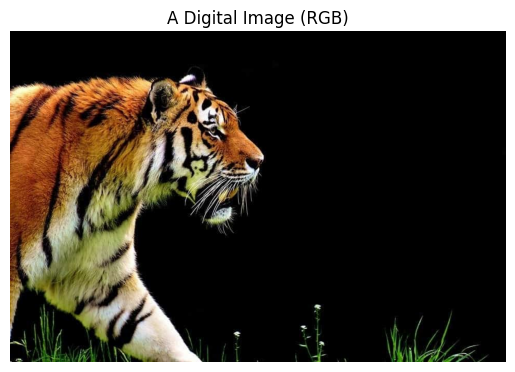

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (example: tiger)
img = cv2.imread("tiger.jpg")

# OpenCV loads images in BGR format → convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("A Digital Image (RGB)")
plt.axis("off")
plt.show()

## **1.2 Image as a Pixel Matrix**

Although the tiger image looks natural, the computer stores it as numbers.

$$
(height, width, channels)
$$

Example:

$$
512 × 512 × 3
$$

Meaning:
* 512 pixels tall
* 512 pixels wide
* 3 color channels (Red, Green, Blue)

Let’s check its shape:

In [ ]:
print("Image Shape:", img_rgb.shape)

Image Shape: (640, 960, 3)


#### **Pixel Values**

Each pixel stores intensity values: [145, 120, 90]

So every pixel is simply a color vector.

In [ ]:
print("Top-left pixel (RGB):", img_rgb[0, 0])

Top-left pixel (RGB): [0 0 0]


## **1.3 Image Types**

Digital images can be stored in different formats depending on how pixel values are represented.

#### **Grayscale Images**

A grayscale image contains only one channel, representing brightness:

* 0 → black
* 255 → white

Let’s convert the tiger image to grayscale:

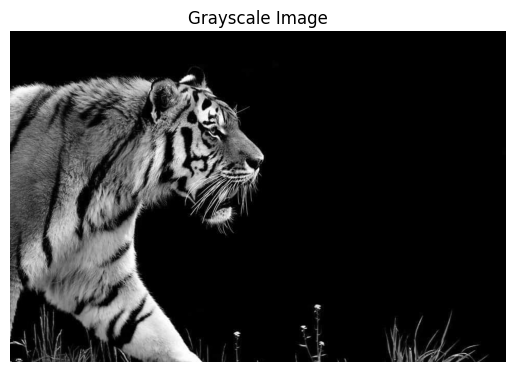

In [ ]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [ ]:
# Now the image is stored as a 2D array:
print("Grayscale Shape:", img_gray.shape)
print("Pixel intensity example:", img_gray[0, 0])

Grayscale Shape: (640, 960)
Pixel intensity example: 0


#### **Binary Images**

A binary image contains only two possible values:

* black (0)
* white (255)

This is very useful for tasks such as:

* Sudoku digit detection
* Object segmentation
* Thresholding

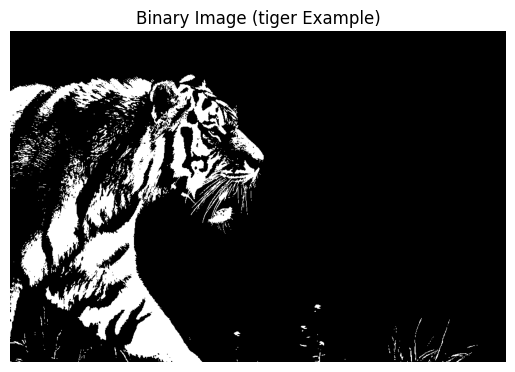

In [ ]:
tiger = cv2.imread("tiger.jpg", cv2.IMREAD_GRAYSCALE)

# Convert to binary using thresholding
_, tiger_binary = cv2.threshold(tiger, 120, 255, cv2.THRESH_BINARY)

plt.imshow(tiger_binary, cmap="gray")
plt.title("Binary Image (tiger Example)")
plt.axis("off")
plt.show()

## **1.4 Comparing Image Types**
We can clearly see the difference between RGB, grayscale, and binary images:

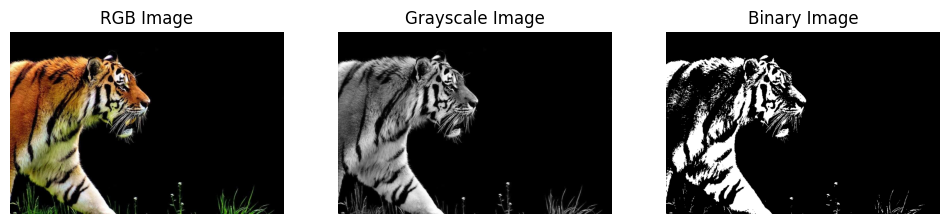

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(tiger_binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.show()

##**1.5 Resolution**

Resolution refers to the number of pixels in an image:

$$
width×height
$$

A higher resolution means more detail, but also more storage and processing cost.

Let’s check resolution using a chessboard image:

In [ ]:
chess = cv2.imread("chessboard.png")
chess_rgb = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)

print("Chessboard Resolution:", chess_rgb.shape[1], "x", chess_rgb.shape[0])

Chessboard Resolution: 1754 x 1240


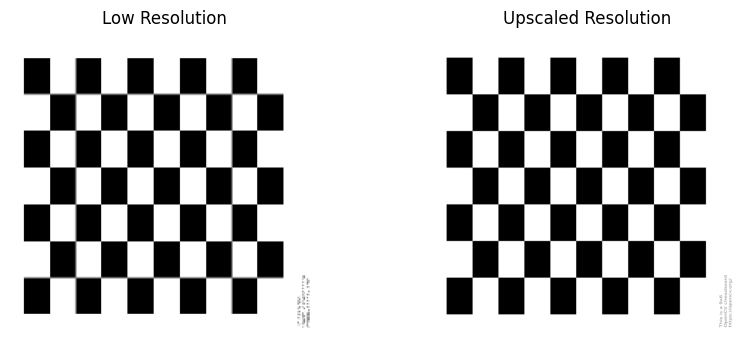

In [ ]:
# Resizing Example
# Even though the image becomes larger, no new details are added.

small = cv2.resize(chess_rgb, (200, 200))
large = cv2.resize(chess_rgb, (800, 800))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(small)
plt.title("Low Resolution")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(large)
plt.title("Upscaled Resolution")
plt.axis("off")

plt.show()

## **1.6 Bit Depth**

Bit depth determines how many intensity levels a pixel can represent.

Most common images are:

* 8-bit per channel

So pixel values range from:

$$
0
→
255
$$

In [ ]:
print("Image Data Type:", img_gray.dtype)
print("Minimum intensity:", img_gray.min())
print("Maximum intensity:", img_gray.max())

Image Data Type: uint8
Minimum intensity: 0
Maximum intensity: 255


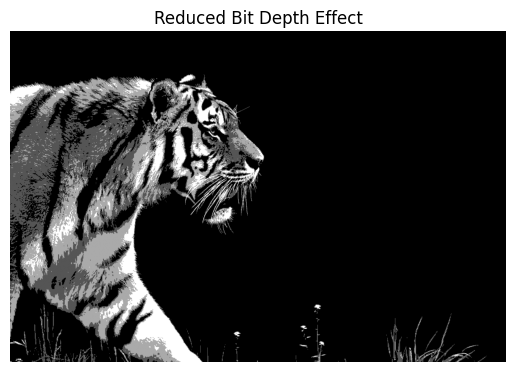

In [ ]:
# Reduced Bit Depth Effect: If we reduce intensity levels, we lose smooth detail:
reduced = (img_gray // 64) * 64

plt.imshow(reduced, cmap="gray")
plt.title("Reduced Bit Depth Effect")
plt.axis("off")
plt.show()